In [3]:
pip install climatePy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.1/432.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 68.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 35.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
import sys
import os
import subprocess as sp
from osgeo import gdal
from osgeo import ogr
gdal.UseExceptions()
import geopandas as gpd
import matplotlib.pyplot as plt
import climatePy
import geotable
import numpy as np

In [2]:
## Download fire perimeter data
url = "https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/MTBS_Fire/data/composite_data/burned_area_extent_shapefile/mtbs_perimeter_data.zip"

sp.call(["wget","-o","/home/jovyan/data-store/hackathon2023_E/data/mtbs_perimeter_data.zip", url])

0

In [5]:
# load climate catalog
catalog = climatePy.params()

In [6]:
catalog

,id,asset,URL,type,varname,variable,description,units,model,ensemble,...,Y1,Yn,resX,resY,ncols,nrows,crs,toptobottom,tiled,dim_order
0,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_ACCESS1-0_rcp45_r1i1p1,pr,Precipitation,mm/d,ACCESS1-0,r1i1p1,...,25.18750,52.81250,0.1250,0.1250,462,222,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
1,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_ACCESS1-0_rcp85_r1i1p1,pr,Precipitation,mm/d,ACCESS1-0,r1i1p1,...,25.18750,52.81250,0.1250,0.1250,462,222,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
2,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp26_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.18750,52.81250,0.1250,0.1250,462,222,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
3,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp45_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.18750,52.81250,0.1250,0.1250,462,222,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
4,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp60_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.18750,52.81250,0.1250,0.1250,462,222,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,WUS_HSP,None,https://cida.usgs.gov/thredds/dodsC/WUS_HSP/SD...,opendap,SD_A1B_2040s_pcm1_SWE,SWE,Snow water equivalent,mm,pcm1,None,...,31.34375,52.84375,0.0625,0.0625,347,345,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,,TYX
37006,WUS_HSP,None,https://cida.usgs.gov/thredds/dodsC/WUS_HSP/SD...,opendap,SD_A1B_2040s_pcm1_TAVG,TAVG,Average daily air temperature,C,pcm1,None,...,31.34375,52.84375,0.0625,0.0625,347,345,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,,TYX
37007,WUS_HSP,None,https://cida.usgs.gov/thredds/dodsC/WUS_HSP/SD...,opendap,SD_A1B_2040s_pcm1_TMAX,TMAX,Maximum daily air temperature,C,pcm1,None,...,31.34375,52.84375,0.0625,0.0625,347,345,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,,TYX
37008,WUS_HSP,None,https://cida.usgs.gov/thredds/dodsC/WUS_HSP/SD...,opendap,SD_A1B_2040s_pcm1_TMIN,TMIN,Minimum daily air temperature,C,pcm1,None,...,31.34375,52.84375,0.0625,0.0625,347,345,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,,TYX


In [76]:
from shapely.geometry import box

bbox = box(-170, 72, -140, 56)

bbox = gpd.GeoDataFrame(geometry=[bbox], crs ='EPSG:4326')

vpd = climatePy.getGridMET(
       AOI       = bbox,
       varname   = "tavg",
       startDate = "2018-09-01"
       )

TypeError: can only concatenate str (not "Categorical") to str

In [77]:
raw = climatePy.climatepy_filter(
  id        = "terraclim",
  AOI       = bbox,
  varname   = "tavg"
)

TypeError: can only concatenate str (not "Categorical") to str

In [78]:
raw

,id,asset,URL,type,varname,variable,description,units,model,ensemble,...,Y1,Yn,resX,resY,ncols,nrows,crs,toptobottom,tiled,dim_order
36519,terraclim,None,http://thredds.northwestknowledge.net:8080/thr...,opendap,vpd,vpd,vapor_pressure_deficit,kPa,None,None,...,89.979167,-89.979167,0.041667,0.041667,8640,4320,+proj=longlat +a=6378137 +f=0.0033528106647474...,False,,TYX


In [67]:
vpd4 = climatePy.getTerraClim(
    AOI       = bbox,
    varname   = "vpd",
    startDate = "2004-01-01",
    endDate   = "2004-12-01"
    )

source:	http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg...
varname(s): 
 > vpd [kPa] (vapor_pressure_deficit)
dimensions: 721.0, 385.0, 12 (names: lon, lat, time)
resolution: 0.042, 0.042, 1 months 
extent:     -170.0, -139.96, 55.92, 71.96 (xmin, xmax, ymin, ymax)
crs:        +proj=longlat +ellps=WGS84 +no_defs +type=crs
time:       2004-01-01 00:00:00 to 2004-12-01 00:00:00
values: 1 * 721 * 385 * 12 (vars*X*Y*T)


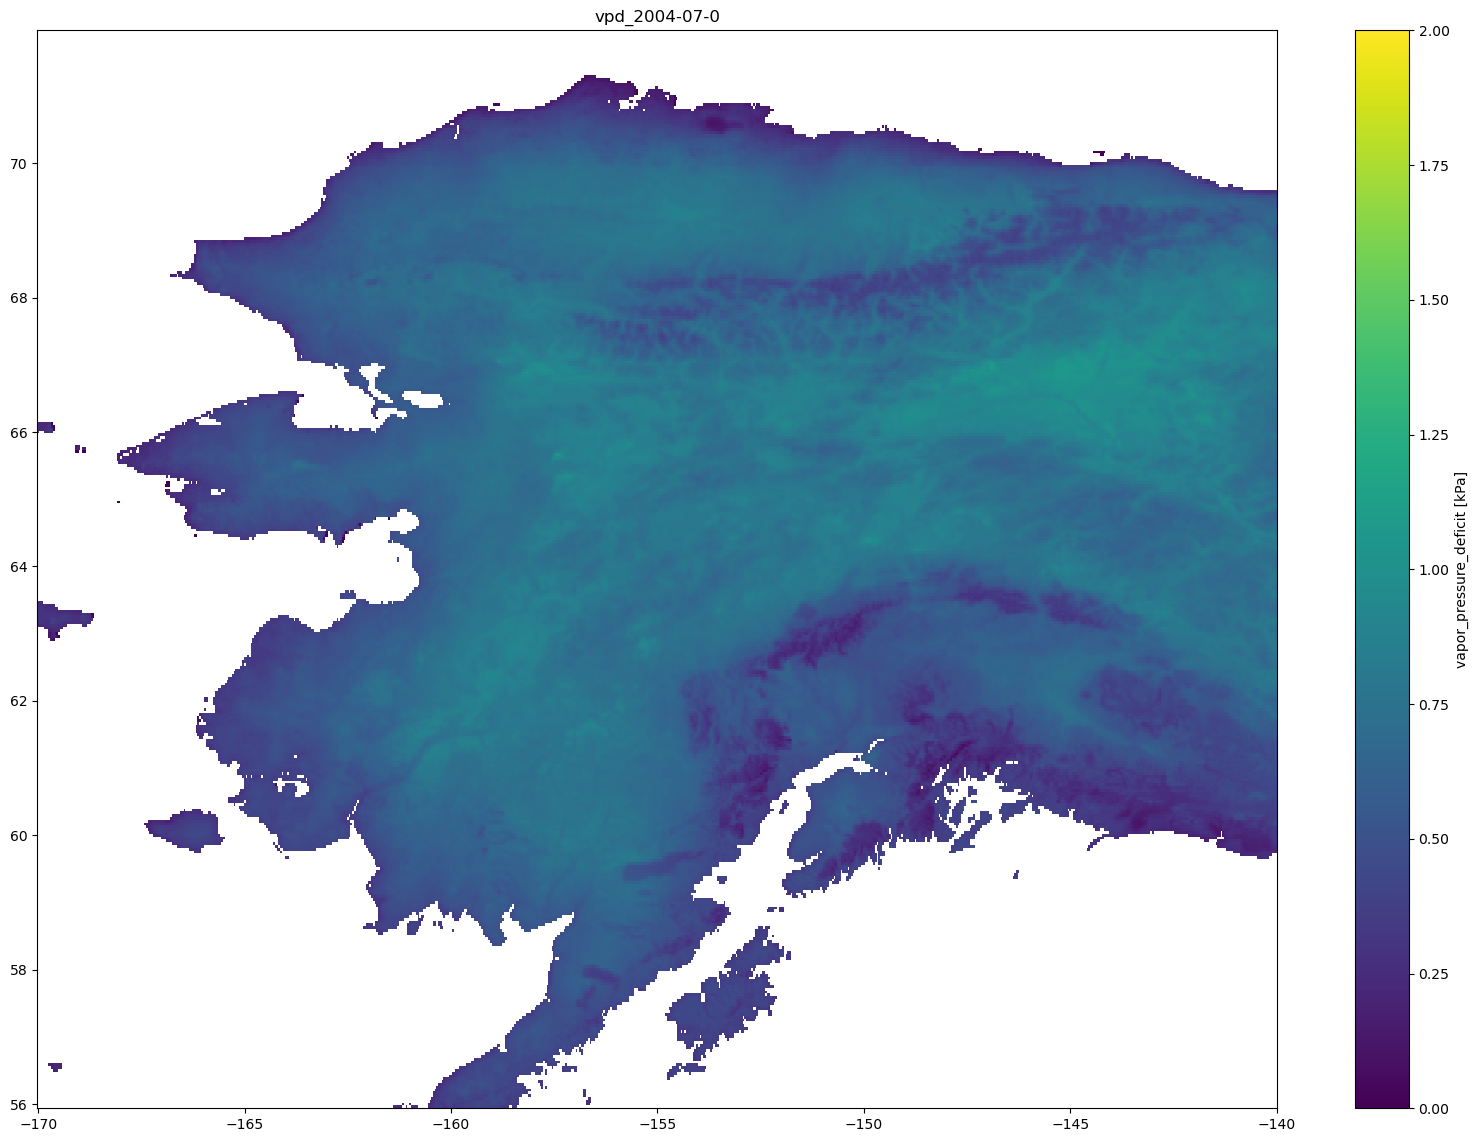

In [70]:
plt.figure(figsize=(20, 14))
vpd4["vpd"].isel(time = 6).plot(vmin=0, vmax=2,  add_colorbar = True)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.title(str(vpd4["vpd"].isel(time = 6).time.values)[0:13])
# plt.tick_params(axis='x', labelsize=8)
# plt.tick_params(axis='y', labelsize=8)
# fig.savefig("north_carolina_tmin_tmax.png")
#plt.savefig("/man/figures/nc_tmin_tmax_gridmet.png")
plt.show()

In [71]:
vpd6 = climatePy.getTerraClim(
    AOI       = bbox,
    varname   = "vpd",
    startDate = "2006-01-01",
    endDate   = "2006-12-01"
    )

source:	http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg...
varname(s): 
 > vpd [kPa] (vapor_pressure_deficit)
dimensions: 721.0, 385.0, 12 (names: lon, lat, time)
resolution: 0.042, 0.042, 1 months 
extent:     -170.0, -139.96, 55.92, 71.96 (xmin, xmax, ymin, ymax)
crs:        +proj=longlat +ellps=WGS84 +no_defs +type=crs
time:       2006-01-01 00:00:00 to 2006-12-01 00:00:00
values: 1 * 721 * 385 * 12 (vars*X*Y*T)


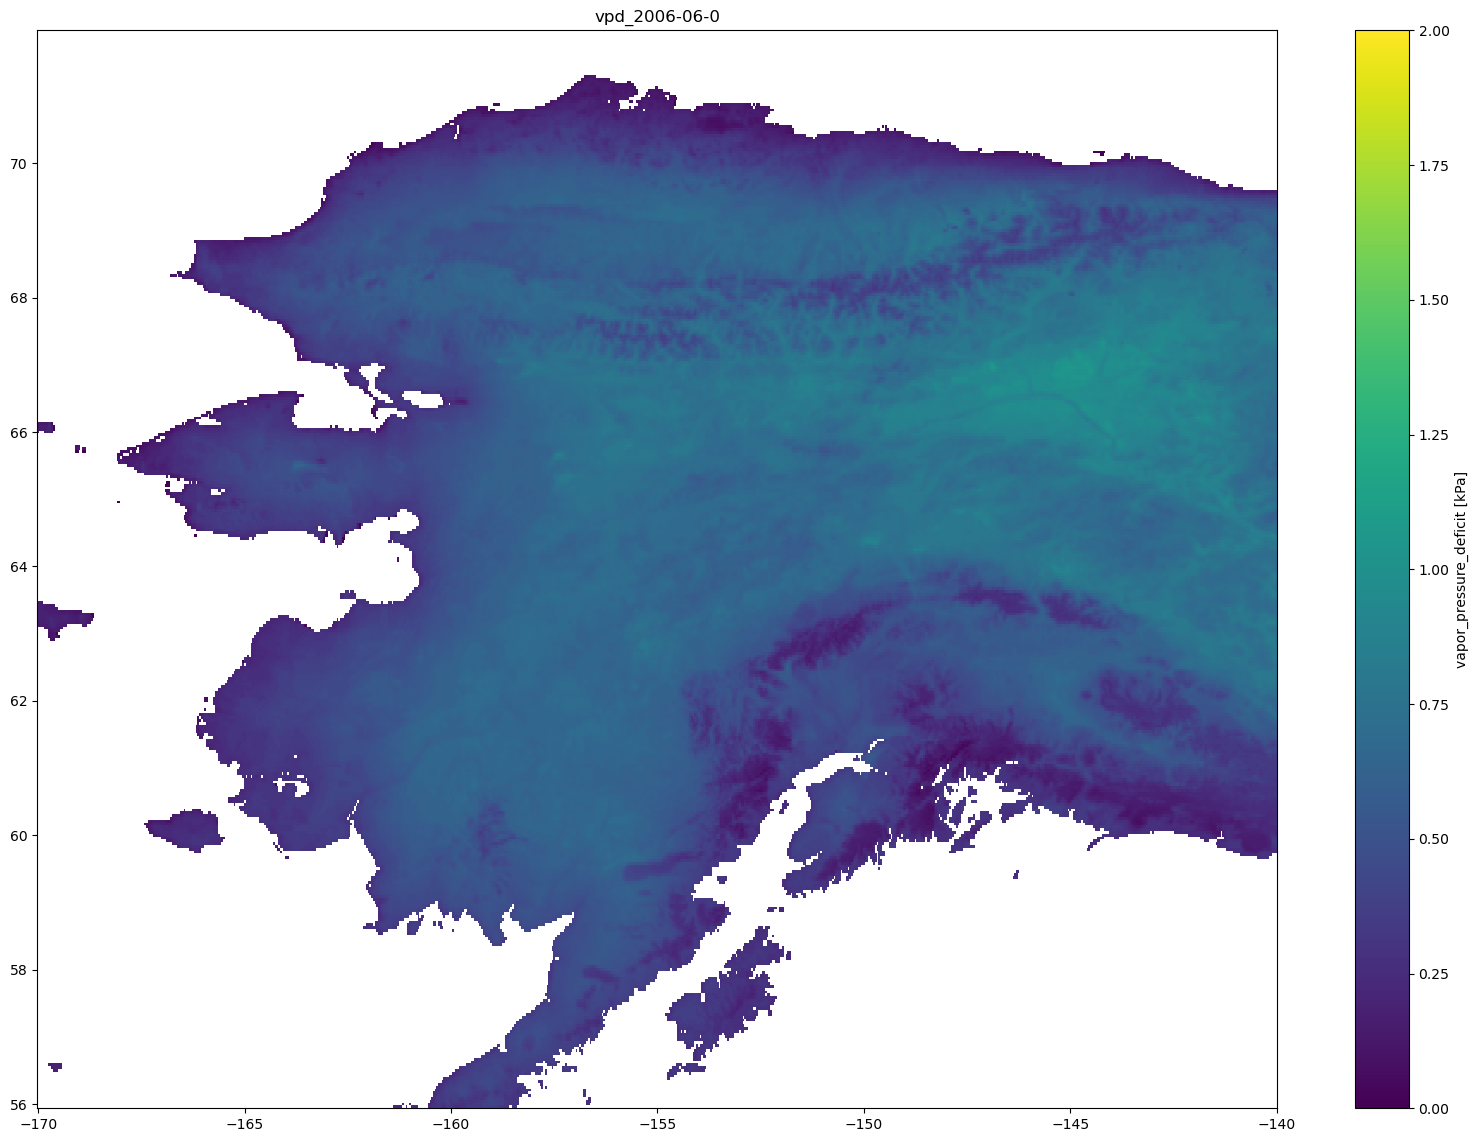

In [72]:
plt.figure(figsize=(20, 14))
vpd6["vpd"].isel(time = 5).plot(vmin=0, vmax=2,  add_colorbar = True)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.title(str(vpd6["vpd"].isel(time = 5).time.values)[0:13])
# plt.tick_params(axis='x', labelsize=8)
# plt.tick_params(axis='y', labelsize=8)
# fig.savefig("north_carolina_tmin_tmax.png")
#plt.savefig("/man/figures/nc_tmin_tmax_gridmet.png")
plt.show()

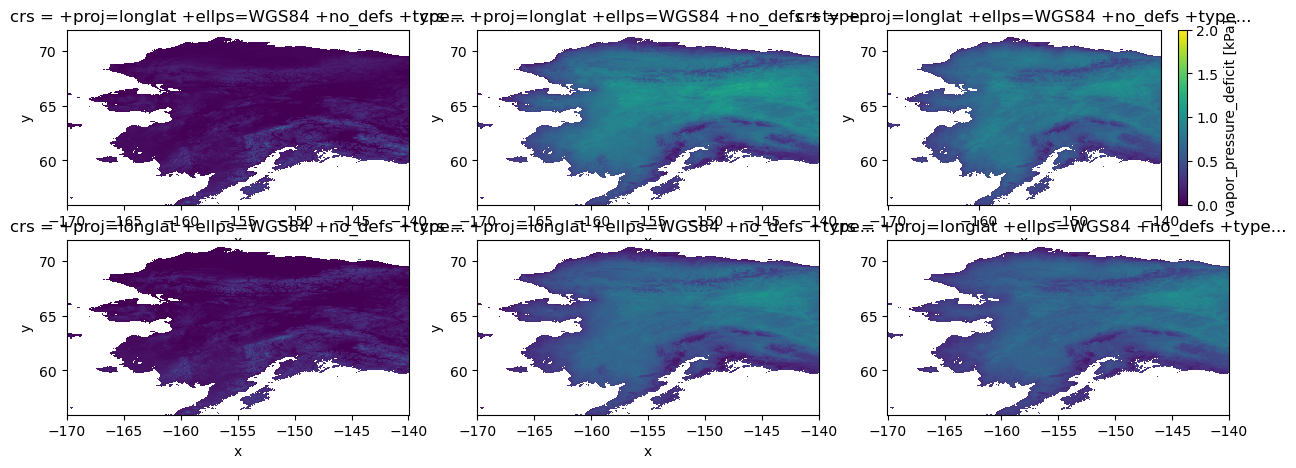

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(2,3,1)
vpd4["vpd"].isel(time = 1).plot(vmin=0, vmax=2,  add_colorbar = False)
plt.subplot(2,3,2)
vpd4["vpd"].isel(time = 5).plot(vmin=0, vmax=2,  add_colorbar = False)
plt.subplot(2,3,3)
vpd4["vpd"].isel(time = 6).plot(vmin=0, vmax=2,  add_colorbar = True)
plt.subplot(2,3,4)
vpd6["vpd"].isel(time = 1).plot(vmin=0, vmax=2,  add_colorbar = False)
plt.subplot(2,3,5)
vpd6["vpd"].isel(time = 5).plot(vmin=0, vmax=2,  add_colorbar = False)
plt.subplot(2,3,6)
vpd6["vpd"].isel(time = 6).plot(vmin=0, vmax=2,  add_colorbar = False)

plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.show()

In [74]:
temp4 = climatePy.getTerraClim(
    AOI       = bbox,
    varname   = "tavg",
    startDate = "2004-01-01",
    endDate   = "2004-12-01"
    )

TypeError: can only concatenate str (not "Categorical") to str